In [3]:
# See the value of multiple statements at once
# output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to suppress the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Importing the packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.keys()

Index(['CustomerID', 'Genre', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [10]:
X=df['Income']
y=df['SpendingScore']

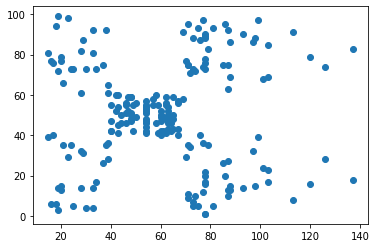

In [11]:
plt.scatter(X,y)
plt.show()

### k- means clustering

#### plot the graph of k(number of clusters) vs SSE
#### SSE is sum of squared distances of data points to their closest cluster center
#### choose appropriate k where error is minimum or significantly not reducing further

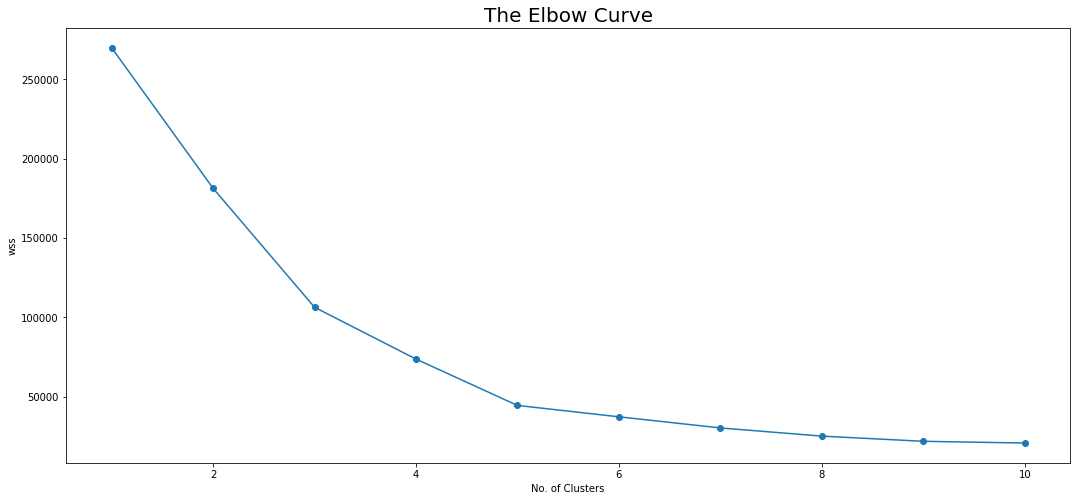

In [12]:
x=df.iloc[:,[3,4]].values
wss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(x)
    wss.append(km.inertia_) 
    # inertia_ is the sum of squared dist from closest cluster

plt.figure(figsize=(18,8))
plt.plot(range(1, 11), wss, marker = 'o')
plt.title('The Elbow Curve', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wss')
plt.show();

In [14]:
km = KMeans(n_clusters = 5, random_state = 0)
y_means = km.fit_predict(x)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

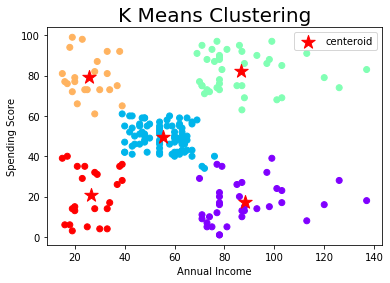

In [19]:
plt.scatter(x[:,0],x[:,1],c=km.labels_,cmap='rainbow')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'red' , label = 'centeroid',
            marker='*')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show();

In [20]:
### alternative way of visualizing the clusters

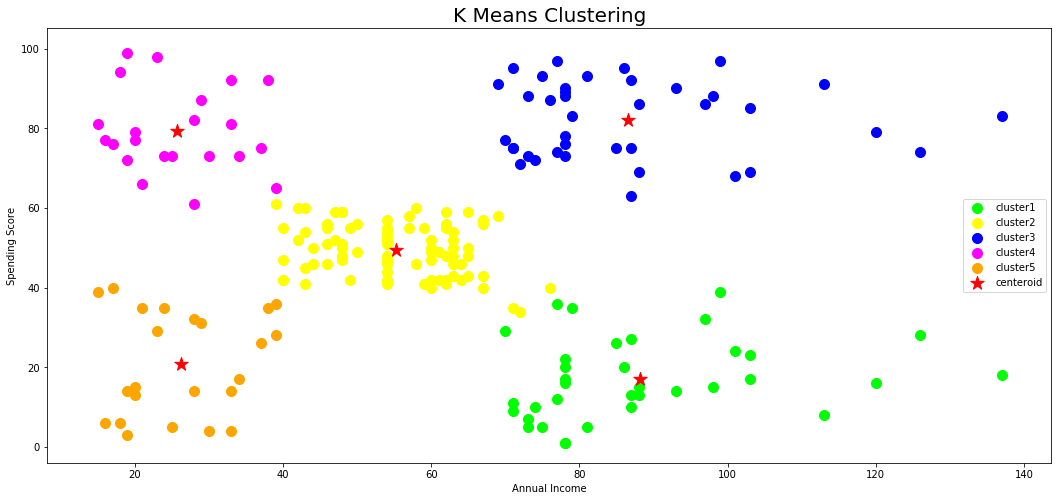

In [23]:
km = KMeans(n_clusters = 5, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(18,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'lime', label = 'cluster1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'blue', label = 'cluster3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'cluster4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'cluster5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'red' , label = 'centeroid', marker='*')


plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show();

### Hierarchical clustering

# Hierarchical Clustering
Linkage Methods:
- "ward" minimizes the variance of the clusters being merged.
- "average" uses the average of the distances of each observation of the two sets.
- "complete" or maximum linkage uses the maximum distances between all observations of the two sets.
- "single" uses the minimum of the distances between all observations of the two sets.


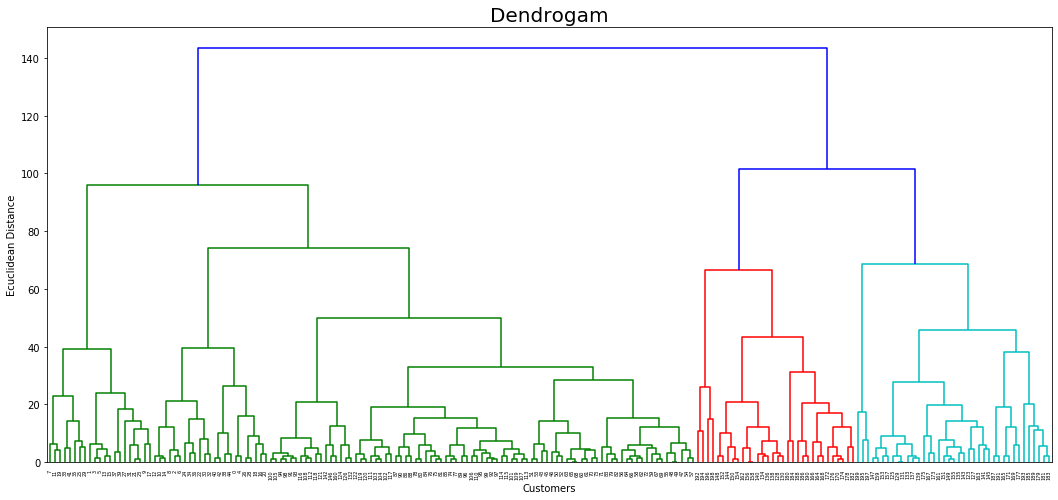

In [24]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'complete'))

plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show();

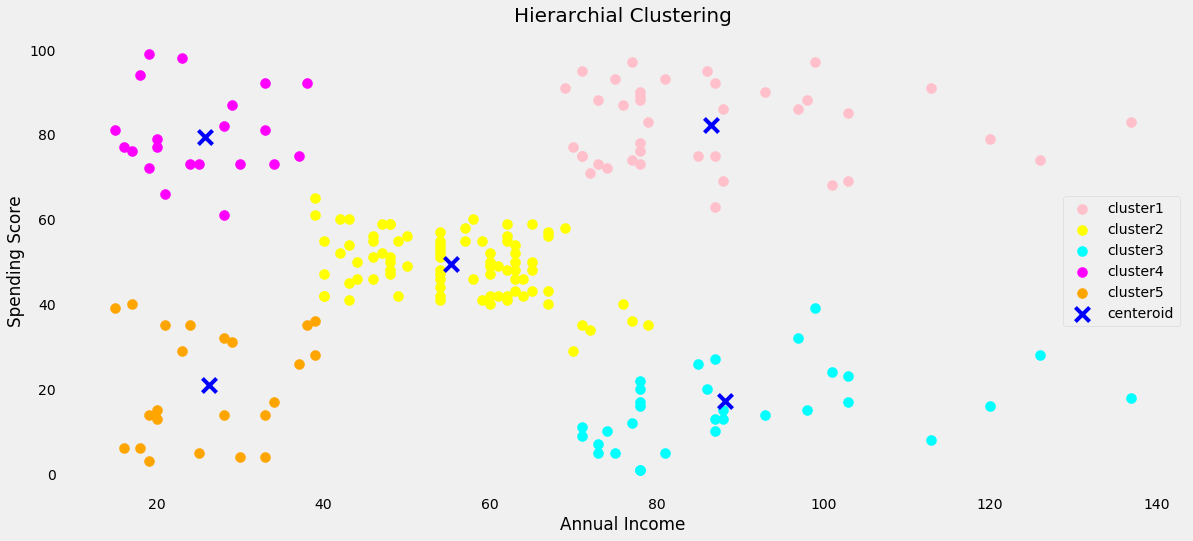

In [26]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)


plt.figure(figsize=(18,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'cluster1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'cluster3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'cluster4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'cluster5')

# the centers are from K-Means.. 
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'blue' , label = 'centeroid', marker = 'x')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show();